In [1]:
import pandas as pd
import numpy as np
df_orginal_withoutblank=pd.read_csv("/Users/humphreyshen/Desktop/2021 Database Project/總表下載數據/df_orginal_withoutblank.csv")
df_withoutblank=pd.DataFrame(df_orginal_withoutblank)
df_withoutblank.head()

/Users/humphreyshen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5,7,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,zh_name,en_name,gender,birthday,age,email,zip_code,region,county,district,address,cell,tele,id_num,last_edit,bye,note
0,1,殷葦婷,NaN,NaN,NaN,NaN,13816630288@163.con,20,CN,上海市,NaN,中國大陸上海市長寧區香花橋路38弄7號401室,NaN,13816630288,NaN,NaN,1,NULL\r
1,2,郭敬子,NaN,1.0,NaN,NaN,jimkuo49@gmail.com,200,TW,基隆市,仁愛區,基隆市仁愛區愛七路53號3樓,918136219,NaN,NaN,NaN,1,NULL\r
2,3,陳仕俍,NaN,NaN,NaN,NaN,gelintex@ms27.hinet.net,205,TW,基隆市,暖暖區,基隆市暖暖區暖碇路169號11樓,920521092,02-24573016,NaN,NaN,1,NULL\r
3,4,郭珈郗,NaN,NaN,NaN,NaN,grcekwk@gmail.com,NaN,HK,NaN,NaN,香港九龍官塘順安村安群樓514室,NaN,(+852)35929419,NaN,NaN,1,NULL\r
4,5,陸大文,NaN,1.0,1954-05-26,NaN,kathyhung168@gmail.com,105,TW,台北市,松山區,台北市松山區復興北路99號3樓,0918-032-920,02-25478801,A101653944,NaN,1,NULL\r


In [2]:
df_email_data=df_withoutblank['email']
df_email_data.head()

0        13816630288@163.con
1         jimkuo49@gmail.com
2    gelintex@ms27.hinet.net
3          grcekwk@gmail.com
4     kathyhung168@gmail.com
Name: email, dtype: object

In [6]:
df_email_data.notnull().sum()

29339

In [7]:
df_birthday_data=df_withoutblank['birthday']
df_birthday_data.head()

0           NaN
1           NaN
2           NaN
3           NaN
4    1954-05-26
Name: birthday, dtype: object

In [8]:
df_birthday_data.notnull().sum()

26643

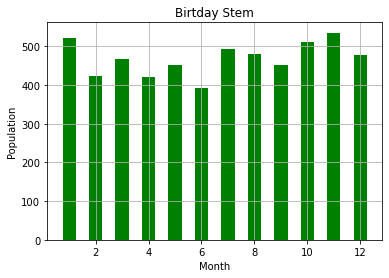

In [54]:
#目前生日寄送量

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import figure
import seaborn as sns
from dateutil.relativedelta import relativedelta
from datetime import date
from datetime import datetime
%matplotlib inline

#呼叫資料表
raw_data_allpersonal = pd.read_csv ('/Users/humphreyshen/Desktop/2021 Database Project/測試數據/email寄發資料群/GAS-校友資料彙整(生日Email)0713.csv')

birthday_month_pre=raw_data_allpersonal['出生月']
birthday_month_pre_fromat=birthday_month_pre.notnull()
birthday_month_pre_notnull=birthday_month_pre[birthday_month_pre_fromat]
birthday_month_pre_notnull_groupby=birthday_month_pre_notnull.value_counts()
birthday_month_pre_notnull_groupby_format=birthday_month_pre_notnull_groupby.index.astype('Int64') #DataFrame之Index為整數(INT)型態

x=(birthday_month_pre_notnull_groupby_format)
y=(birthday_month_pre_notnull_groupby)
plt.bar(x,y,align='center',width=0.5, color='green')
plt.title("Birtday Stem") #設定標頭
plt.xlabel("Month") #設定X軸名稱
plt.ylabel("Population") #設定Y軸名稱
plt.grid(True) #設定標格
plt.show()

/Users/humphreyshen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5,7,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


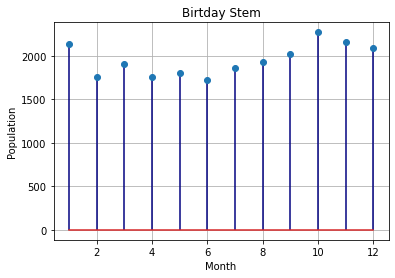

In [51]:
#計算未來生日寄送工作量

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import figure
import seaborn as sns
from dateutil.relativedelta import relativedelta
from datetime import date
from datetime import datetime
%matplotlib inline

#呼叫資料表
raw_data_allpersonal = pd.read_csv ('/Users/humphreyshen/Desktop/2021 Database Project/總表下載數據/df_orginal_withoutblank.csv')
data_pre=pd.DataFrame(raw_data_allpersonal)

email=data_pre['email']
df_email=pd.DataFrame(email)

birthday=data_pre['birthday']
df_birthday=pd.DataFrame(birthday)


combined=df_email.join(df_birthday)
select=combined.dropna()


only_birthday=select['birthday']
birthday_format=pd.to_datetime(only_birthday) #格式化生日
birthday_format_month=birthday_format.dt.month #格式化生日後，只保留月份

Select_month_group=birthday_format_month.value_counts()#計算個別月份人數

histogram_pre=pd.DataFrame(Select_month_group) #轉Series為DataFrame
histogram_index_format=histogram_pre.index.astype('Int64') #DataFrame之Index為整數(INT)型態
x=(histogram_index_format) #設X軸為月份
y=(histogram_pre.birthday) #設Y軸為人數

plt.stem(x,y,linefmt='Navy')
plt.title("Birtday Stem") #設定標頭
plt.xlabel("Month") #設定X軸名稱
plt.ylabel("Population") #設定Y軸名稱
plt.grid(True) #設定標格
plt.show()


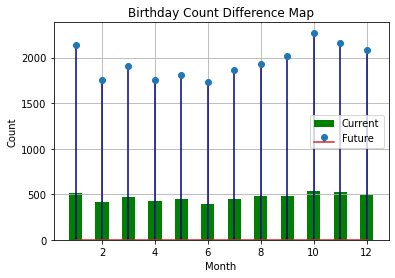

In [58]:
x=(histogram_index_format) 
y1=(histogram_pre.birthday) 
y2=(birthday_month_pre_notnull_groupby)


plt.bar(x,y2,align='center',width=0.5, color='green', label='Current')
plt.stem(x,y1,linefmt='Navy',label='Future')
plt.legend()
plt.title("Birthday Count Difference Map") #設定標頭
plt.xlabel("Month") #設定X軸名稱
plt.ylabel("Count") #設定Y軸名稱tf
plt.grid(True) #設定標格
plt.savefig("生日計量差異圖_最終.jpg",dpi=500) #輸出
